In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("BodyFat - Extended.csv")
data.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
data.drop("Original",inplace=True,axis=1)

# Making a new dataset to do some analysis on the average size of body parts

In [82]:
# Trying to find the Average body fat for above average parts
# Making a dictionary with average for every column except bodyfat

df=data.drop("Sex",axis=1)
avg={}
for column in df.columns:
    avg[column]=round(df[column].mean(),2)
del avg["BodyFat"]
print(avg)

{'Age': 34.55, 'Weight': 72.28, 'Height': 1.73, 'Neck': 35.25, 'Chest': 94.16, 'Abdomen': 82.82, 'Hip': 98.65, 'Thigh': 56.04, 'Knee': 37.37, 'Ankle': 22.35, 'Biceps': 29.9, 'Forearm': 26.48, 'Wrist': 17.14}


In [119]:
# This analysis will help in getting if the size of any body part really does matter in determining the BodyFat 

for column in df.columns[1:]:
    print("For ",column,":")
    print("Body Fat mean of greater than average:",round(df[df[column]>avg[column]]["BodyFat"].mean(),2))
    print("Body Fat mean of lesser than average:",round(df[df[column]<=avg[column]]["BodyFat"].mean(),2))
    print()

For  Age :
Body Fat mean of greater than average: 20.17
Body Fat mean of lesser than average: 20.32

For  Weight :
Body Fat mean of greater than average: 22.3
Body Fat mean of lesser than average: 18.43

For  Height :
Body Fat mean of greater than average: 19.58
Body Fat mean of lesser than average: 20.89

For  Neck :
Body Fat mean of greater than average: 20.1
Body Fat mean of lesser than average: 20.41

For  Chest :
Body Fat mean of greater than average: 22.12
Body Fat mean of lesser than average: 18.68

For  Abdomen :
Body Fat mean of greater than average: 21.73
Body Fat mean of lesser than average: 18.77

For  Hip :
Body Fat mean of greater than average: 23.91
Body Fat mean of lesser than average: 17.06

For  Thigh :
Body Fat mean of greater than average: 21.8
Body Fat mean of lesser than average: 18.82

For  Knee :
Body Fat mean of greater than average: 22.24
Body Fat mean of lesser than average: 18.16

For  Ankle :
Body Fat mean of greater than average: 21.31
Body Fat mean of les

In [120]:
# Calculating the difference b/w both the averages 
# This shows us if the particular column is affecting our bodyfat or not 
# The higher the difference the higher chance of your bodyfat increasing if your given body part is above average in size

for column in df.columns[1:]:
    print("Difference b/w greater than average and lesser than average for column",column,":")
    print(round((round(df[df[column]>avg[column]]["BodyFat"].mean(),2)) - (round(df[df[column]<=avg[column]]["BodyFat"].mean(),2)),2))
    print()

Difference b/w greater than average and lesser than average for column Age :
-0.15

Difference b/w greater than average and lesser than average for column Weight :
3.87

Difference b/w greater than average and lesser than average for column Height :
-1.31

Difference b/w greater than average and lesser than average for column Neck :
-0.31

Difference b/w greater than average and lesser than average for column Chest :
3.44

Difference b/w greater than average and lesser than average for column Abdomen :
2.96

Difference b/w greater than average and lesser than average for column Hip :
6.85

Difference b/w greater than average and lesser than average for column Thigh :
2.98

Difference b/w greater than average and lesser than average for column Knee :
4.08

Difference b/w greater than average and lesser than average for column Ankle :
2.05

Difference b/w greater than average and lesser than average for column Biceps :
1.98

Difference b/w greater than average and lesser than average for

In [88]:
#This shows the Body part ,if above average in size will affect how much in increase of your bodyfat  

diff={}

for column in df.columns[1:]:
    diff[column]=round((round(df[df[column]>avg[column]]["BodyFat"].mean(),2)) - (round(df[df[column]<=avg[column]]["BodyFat"].mean(),2)),2)

def sort_dict_by_value(d):
    return dict(sorted(d.items(), key = lambda x: x[1], reverse = True))

print(sort_dict_by_value(diff))
diff=sort_dict_by_value(diff)

{'Hip': 6.85, 'Knee': 4.08, 'Weight': 3.87, 'Chest': 3.44, 'Thigh': 2.98, 'Abdomen': 2.96, 'Ankle': 2.05, 'Biceps': 1.98, 'Wrist': 0.13, 'Forearm': 0.12, 'Age': -0.15, 'Neck': -0.31, 'Height': -1.31}


In [123]:
diff_keys=list(diff.keys())
diff_values=list(diff.values())

for i in range(len(diff_values)):
    diff_values[i] += 2.31
    diff_values[i] = round(diff_values[i],2)
diff_values

[9.16, 6.39, 6.18, 5.75, 5.29, 5.27, 4.36, 4.29, 2.44, 2.43, 2.16, 2.0, 1.0]

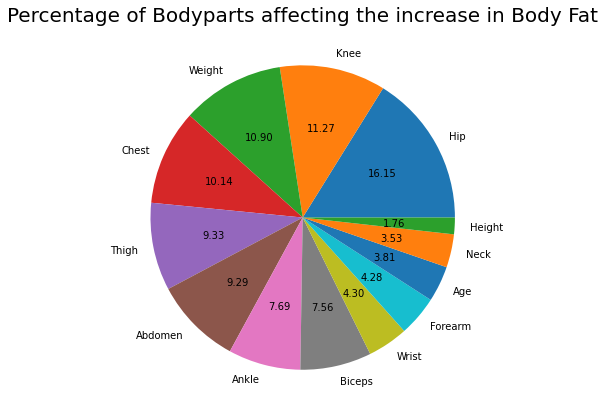

In [126]:
plt.figure(figsize=(12,7))
plt.pie(diff_values,labels=diff_keys,autopct="%.2f")
plt.title("Percentage of OverSize Bodyparts affecting the increase in Body Fat",size=20)
plt.show()

In [89]:
diff_keys=list(diff.keys())
diff_values=list(diff.values())

for i in range(len(diff_values)):
    diff_values[i] = abs(diff_values[i])
diff_values

[6.85, 4.08, 3.87, 3.44, 2.98, 2.96, 2.05, 1.98, 0.13, 0.12, 0.15, 0.31, 1.31]

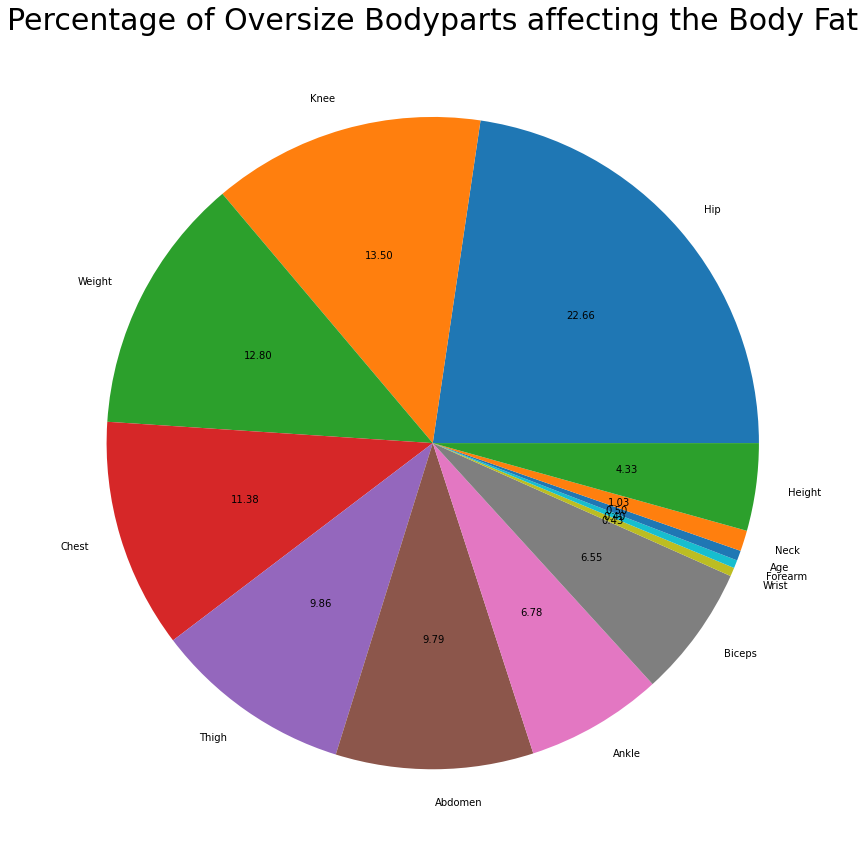

In [92]:
plt.figure(figsize=(25,15))
plt.pie(diff_values,labels=diff_keys,autopct="%.2f")
plt.title("Percentage of Oversize Bodyparts affecting the Body Fat",size=30)
plt.show()

In [16]:
print("Average Male Bodyfat: ",data[data["Sex"]=="M"]["BodyFat"].mean())
print("Average Female Bodyfat: ",data[data["Sex"]=="F"]["BodyFat"].mean())

Average Male Bodyfat:  19.15079365079365
Average Female Bodyfat:  21.75505434782608


In [12]:
#Average features of men and women

for column in data.columns[3:]:
    print(f"Average {column}:")
    for gen in data.Sex.unique():
        print(gen,":",round(data[data["Sex"]==gen][column].mean(),2))
    print()

Average Weight:
M : 81.16
F : 60.12

Average Height:
M : 1.78
F : 1.67

Average Neck:
M : 37.99
F : 31.5

Average Chest:
M : 100.82
F : 85.03

Average Abdomen:
M : 92.56
F : 69.48

Average Hip:
M : 99.9
F : 96.94

Average Thigh:
M : 59.41
F : 51.43

Average Knee:
M : 38.59
F : 35.69

Average Ankle:
M : 23.1
F : 21.32

Average Biceps:
M : 32.27
F : 26.64

Average Forearm:
M : 28.66
F : 23.49

Average Wrist:
M : 18.23
F : 15.65



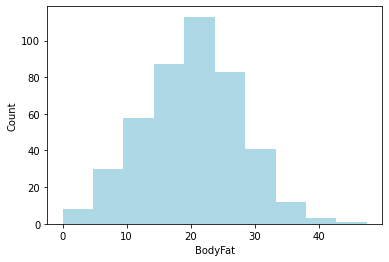

In [20]:
plt.hist(data["BodyFat"],color="lightblue",bins=10)
plt.xlabel("BodyFat")
plt.ylabel("Count")
plt.show()

# Making a new dataset for age bins column to do some analyis on the same

In [86]:
DF=data
DF["Age-bin"]=DF["Age"]//10
DF.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Age-bin
0,12.3,1,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,2
1,6.1,1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,2
2,25.3,1,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,2
3,10.4,1,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,2
4,28.7,1,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,2


In [58]:
#Average BodyMeasures for every  Age Bin

for column in DF.columns[3:-1]:
    print(f"Average {column} according to age bins:")
    for bins in sorted(DF["Age-bin"].unique()):
        print(bins,":",round(DF[DF["Age-bin"]==bins][column].mean(),2))
    print()

Average Weight according to age bins:
0 : 62.6
1 : 60.86
2 : 64.37
3 : 81.21
4 : 82.18
5 : 78.84
6 : 81.99
7 : 80.33
8 : 73.14

Average Height according to age bins:
0 : 1.64
1 : 1.66
2 : 1.7
3 : 1.79
4 : 1.79
5 : 1.77
6 : 1.75
7 : 1.75
8 : 1.78

Average Neck according to age bins:
0 : 34.0
1 : 31.51
2 : 32.76
3 : 38.1
4 : 37.76
5 : 38.21
6 : 38.62
7 : 38.66
8 : 37.8

Average Chest according to age bins:
0 : 86.5
1 : 85.06
2 : 87.93
3 : 99.76
4 : 100.85
5 : 100.61
6 : 104.65
7 : 103.77
8 : 96.4

Average Abdomen according to age bins:
0 : 72.5
1 : 70.85
2 : 73.0
3 : 91.27
4 : 93.08
5 : 92.19
6 : 97.14
7 : 99.09
8 : 95.4

Average Hip according to age bins:
0 : 98.5
1 : 97.39
2 : 97.55
3 : 100.01
4 : 100.6
5 : 98.2
6 : 99.96
7 : 98.5
8 : 99.3

Average Thigh according to age bins:
0 : 53.5
1 : 51.74
2 : 53.29
3 : 60.39
4 : 59.88
5 : 57.87
6 : 58.25
7 : 56.79
8 : 53.5

Average Knee according to age bins:
0 : 37.5
1 : 36.27
2 : 36.12
3 : 38.45
4 : 38.76
5 : 38.16
6 : 39.07
7 : 38.44
8 : 37.5

In [87]:
d={}
for bins in sorted(DF["Age-bin"].unique()):
    d[bins]=round(DF[DF["Age-bin"]==bins]["Hip"].mean(),2)
d

{0: 98.5,
 1: 97.39,
 2: 97.55,
 3: 100.01,
 4: 100.6,
 5: 98.2,
 6: 99.96,
 7: 98.5,
 8: 99.3}

<BarContainer object of 9 artists>

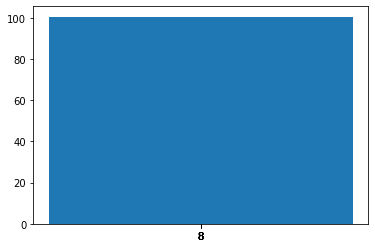

In [90]:
plt.bar(x=105,height=list(d.values()),tick_label=list(d.keys()))

In [83]:
np.max(list(d.values())).astype(int)+5

105

In [4]:
# Getting back to main data to fit an algorithm

d={"M":1,"F":0}
data["Sex"]=data.Sex.replace(d)
data.Sex=data["Sex"].astype(int)

In [19]:
data.describe()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,0.577982,34.545872,72.282203,1.734048,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908
std,7.502125,0.494449,15.500099,15.464366,0.098359,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291
min,0.000000,0.000000,1.000000,42.184800,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,15.022500,0.000000,21.000000,59.875200,1.668780,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000
50%,20.500000,1.000000,28.500000,70.815800,1.730000,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000
75%,25.410000,1.000000,46.000000,81.560000,1.800000,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000
max,47.500000,1.000000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [18]:
data.corr()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
BodyFat,1.000000,-0.171641,0.015808,0.345822,-0.150693,0.121790,0.310410,0.357465,0.588482,0.331031,0.367168,0.182745,0.258221,0.106236,0.089182
Sex,-0.171641,1.000000,0.781513,0.672571,0.574786,0.836811,0.714463,0.778800,0.212824,0.636734,0.518387,0.493881,0.705727,0.810138,0.806997
Age,0.015808,0.781513,1.000000,0.519842,0.372990,0.685648,0.622099,0.686124,0.141997,0.416740,0.406727,0.334627,0.534853,0.605983,0.687237
Weight,0.345822,0.672571,0.519842,1.000000,0.589737,0.889274,0.908069,0.932298,0.805107,0.911007,0.857480,0.734550,0.887622,0.835529,0.852882
Height,-0.150693,0.574786,0.372990,0.589737,1.000000,0.591184,0.493097,0.500683,0.294508,0.456867,0.486657,0.461879,0.500889,0.567114,0.587256
Neck,0.121790,0.836811,0.685648,0.889274,0.591184,1.000000,0.878798,0.905187,0.550018,0.814819,0.718648,0.646243,0.864028,0.881829,0.899204
Chest,0.310410,0.714463,0.622099,0.908069,0.493097,0.878798,1.000000,0.923944,0.652564,0.816111,0.730508,0.618492,0.840143,0.816486,0.818179
Abdomen,0.357465,0.778800,0.686124,0.932298,0.500683,0.905187,0.923944,1.000000,0.676211,0.852196,0.772372,0.640534,0.859768,0.834764,0.856029
Hip,0.588482,0.212824,0.141997,0.805107,0.294508,0.550018,0.652564,0.676211,1.000000,0.782589,0.772544,0.603796,0.653867,0.517417,0.533924
Thigh,0.331031,0.636734,0.416740,0.911007,0.456867,0.814819,0.816111,0.852196,0.782589,1.000000,0.824800,0.697138,0.859831,0.795441,0.785533


In [101]:
data.drop("Age-bin",inplace=True,axis=1)

<AxesSubplot:>

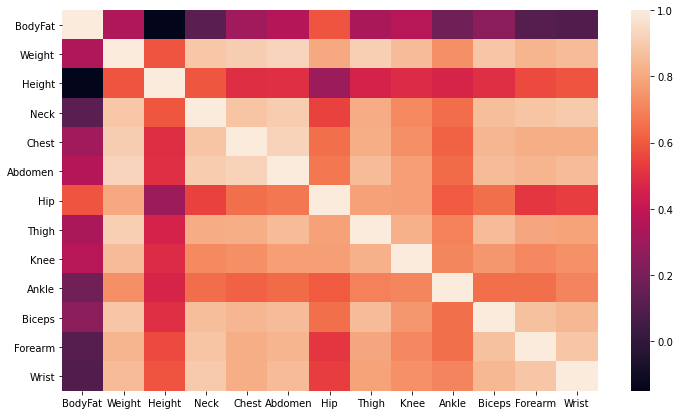

In [102]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())

<AxesSubplot:ylabel='BodyFat'>

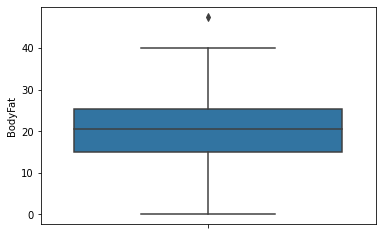

In [5]:
#Checking Outliers

sns.boxplot(y=data["BodyFat"])

In [77]:
# Dividing the dataset into X and y and then doing the train test split

X=data.drop("BodyFat",axis=1)

scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X))

y=data[["BodyFat"]]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

# Linear Regression

In [78]:
# Fitting the data with linear regression model

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [79]:
mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),2)
rmse=round(np.sqrt(mse),2)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

MSE: 17.23
MAE: 3.38
R2: 0.68
RMSE: 4.15


# RandomForestRegressor

In [80]:
# Fitting the data with Random Forest Regressor

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

<ipython-input-80-e4c506399caf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


In [81]:
mse=round(mean_squared_error(y_test,y_pred),2)
mae=round(mean_absolute_error(y_test,y_pred),2)
r2=round(r2_score(y_test,y_pred),2)
rmse=round(np.sqrt(mse),2)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

MSE: 23.33
MAE: 3.88
R2: 0.57
RMSE: 4.83


MAE works better with outliers than MSE